# Microsoft Movie Studio

**Author:** Cynthia Amondi
***

## Overview

<div style="text-align: justify">This repo aids in the pursuit of establishing a foothold in the competitive landscape of original video content creation. Exploratory Data Analysis has been employed to discern the prevailing trends and successful attributes in the contemporary film industry. The method employed involved scrutinizing extensive datasets related to box office performance, encompassing variables such as genre, runtime, studio affiliations, and production budgets. The insightful findings derived include venturing into the Action, Adventure, Sci-Fi genre, as this genre exhibits notable success at the box office. Secondly, maintaining the movie runtime within the range of 90 to 110 minutes, a duration associated with favorable audience reception. Fostering collaboration with BV Studios, a studio entity evidently linked to prosperous box office outcomes, is highly recommended. Additionally, it is advocated to contemplate a judicious production budget falling in the range of 200 million to 400 million, reflecting a prudent investment strategy aligned with prevalent industry practices. </div>


## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.
***

## Data Understanding

In the associated GitHub repository are movie datasets from:**[here](learn-co-curriculum dsc-phase-1-project-v2-4 master zippedData)**
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


* Exploring given files to understand data contained within
* Import relevant libraries
* One file is a database and the others we will use are CSV

In [2]:
#EXPLORING THE DATABASE FILE
#Import libraries
import sqlite3
import pandas as pd

#Connect to the sqlite database
conn = sqlite3.connect('im.db')

with sqlite3.connect('im.db') as conn:
#Query and Fetch data

    cursor = conn.cursor()
    cursor.execute("""SELECT name FROM sqlite_master
    WHERE type = 'table';""")

#Fetch tables then print
    tables = cursor.fetchall()

    for table in tables:
     print(table)  

('movie_basics',)
('directors',)
('known_for',)
('movie_akas',)
('movie_ratings',)
('persons',)
('principals',)
('writers',)


* The database file has 8 tables as depicted above
* Exploring tables
* Reading the tables into DataFrames

## Reading the Data

In [3]:
#Read relevant tables into DataFrames
basics_df = pd.read_sql_query(""" SELECT * FROM movie_basics""", conn)
ratings_df = pd.read_sql_query("""SELECT * FROM movie_ratings""", conn)

#Close database connection
conn.close()

#Merge the relevant tables using the primary key i.e movie_id
merged_db_df = pd.merge(basics_df, ratings_df, on = 'movie_id', how = 'inner')

#Explore DataFrame
print(merged_db_df.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  averagerating  numvotes  
0        2013            175.0    Action,Crime,Drama            7.0        77  
1        2019            114.0       Biography,Drama            7.2        43  
2        2018            122.0                 Drama            6.9      4517  
3        2018              NaN          Comedy,Drama            6.1        13  
4        2017             80.0  Comedy,Drama,Fantasy            6.5       119  


* The merged DataFrame has 8 Columns
* Since the column movie_id has been taken common
* Printing them out to ascertain


In [4]:
#Check columns in the merged_db_df
column_names = merged_db_df.columns.tolist()

#print the names of the columns
for column in column_names:
    print(column)

movie_id
primary_title
original_title
start_year
runtime_minutes
genres
averagerating
numvotes


* Next, explore the CSV files
* Pandas is already imported

In [5]:
#Exploring the CSV files i.e bom, budgets
#Load the CSV files into a DataFrame
bom_df = pd.read_csv('bom.movie_gross.csv')
print(bom_df.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [6]:
budgets_df = pd.read_csv('tn.movie_budgets.csv')
print(budgets_df.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  


In [7]:
print(merged_db_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB
None


In [8]:
print(bom_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


In [9]:
print(budgets_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


## Data Preparation and Cleaning

Merge tables from the IMDB file. Explore the bom and budgets files independently.
Check for duplicates, missing values and outliers.
***
Questions to consider:
* Were there variables you dropped or created? Yes, all missing value rows were dropped.
* How did you address missing values or outliers? 


In [10]:
#Check for duplicates
print("Duplicates in db_df:")
print(len(merged_db_df[merged_db_df.duplicated()]))

print("\nDuplicates in bom_df:")
print(len(bom_df[bom_df.duplicated()]))

print("\nDuplicates in budgets_df:")
print(len(budgets_df[budgets_df.duplicated()]))

Duplicates in db_df:
0

Duplicates in bom_df:
0

Duplicates in budgets_df:
0


* Checking for missing values in the data

In [11]:
#Check for missing values in db
missing_values_db = merged_db_df.isnull().sum()
missing_values_bom = bom_df.isnull().sum()
missing_values_budgets = budgets_df.isnull().sum()

print("Missing values in db_df:")
print(missing_values_db)

print("\nMissing values in bom_df:")
print(missing_values_bom)

print("\nMissing values in budgets_df:")
print(missing_values_budgets)

Missing values in db_df:
movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

Missing values in bom_df:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Missing values in budgets_df:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


* Drop all missing value rows

In [12]:
#Drop the missing value rows
#merged_db_df = merged_db_df.dropna(inplace=True)
if isinstance(merged_db_df, pd.DataFrame):
    merged_db_df = merged_db_df.dropna()
    print("DB after dropping rows with missing values:")
    print(merged_db_df.info())

else:
    print("Variable is not a Pandas DataFrame")

#Fill the runtime and foreign_gross
#merged_db_df['runtime_minutes'] = merged_db_df['runtime_minutes'].fillna(merged_db_df['runtime_minutes'].mode())
#bom_df['foreign_gross'] = bom_df['foreign_gross'].fillna(bom_df['foreign_gross'].mode())

DB after dropping rows with missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB
None


In [13]:
#Drop the missing value rows
#bom_df = bom_df.dropna(inplace=True)
if isinstance(bom_df, pd.DataFrame):
    bom_df = bom_df.dropna()
    print("BOM after dropping rows with missing values:")
    print(bom_df.info())

else:
    print("Variable is not a Pandas DataFrame")

BOM after dropping rows with missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB
None


* Checking for Outliers

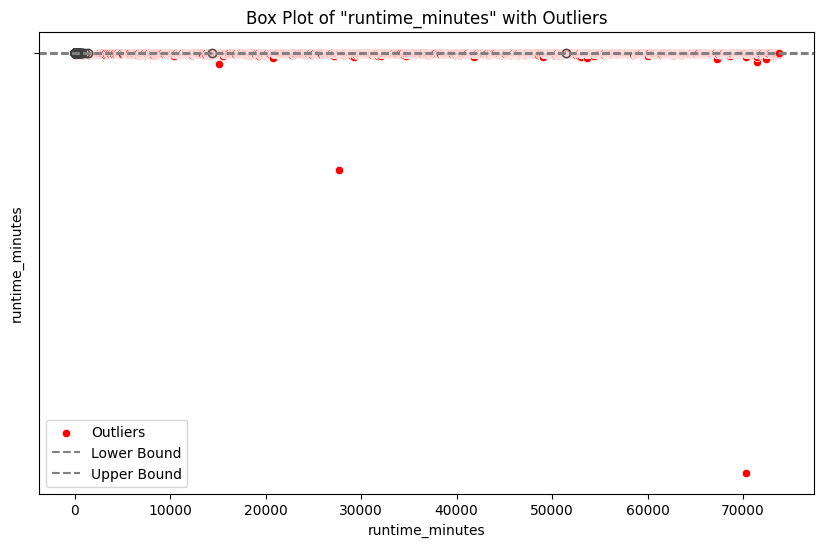

In [14]:
#Checking for outliers
#runtime_minutes outliers
Q1 = merged_db_df['runtime_minutes'].quantile(0.25)
Q3 = merged_db_df['runtime_minutes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = merged_db_df[(merged_db_df['runtime_minutes'] < lower_bound) | (merged_db_df['runtime_minutes'] > upper_bound)]
#outliers.head()

#Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_db_df['runtime_minutes'])
plt.xlabel('runtime_minutes')
plt.title('Box Plot of "runtime_minutes" with Outliers')

# Highlight the outliers on the boxplot
sns.scatterplot(x=outliers.index, y=outliers['runtime_minutes'], color='red', label='Outliers')
plt.axhline(y=lower_bound, color='gray', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='gray', linestyle='--', label='Upper Bound')

plt.legend()
plt.show()

## EDA, Data Visualization and Analysis
* Analysis of the DATABASE File(IMDB)
Steps:
1. Analyze the top ten most voted genres. Check which genre appeals most to viewers.
2. Analyze the average runtimes of these top ten genres. Check the range of the runtimes.
3. Recommendations


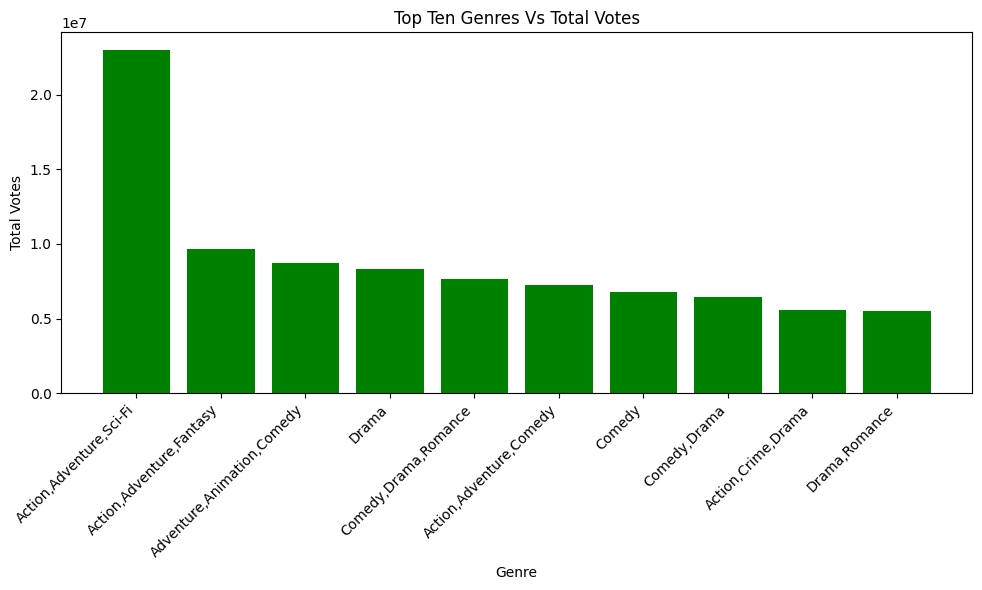

In [15]:
#Calculate total votes per genre for each genre
total_votes_per_genre = merged_db_df.groupby('genres')['numvotes'].sum().reset_index()

# Sort genres by total votes in descending order
sorted_genres = total_votes_per_genre.sort_values(by='numvotes', ascending=False)

# Select the top ten genres
top_ten_genres = sorted_genres.head(10)

#plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_ten_genres['genres'], top_ten_genres['numvotes'], color='green')
plt.xlabel('Genre')
plt.ylabel('Total Votes')
plt.title('Top Ten Genres Vs Total Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Save file
plt.savefig('Top Ten Genres..jpg', format='jpeg', dpi=300)

#Show the plot
plt.show()

* Recommendation: Due to the huge difference between the first highly voted genre and the rest, venture into the 'Action,Adventure,Sci=Fi' genre. This is because it is popular and highly appeals to the viewers/general public.

Top Ten Genres Based on Average Runtime Minutes:
                       genres  numvotes  runtime_minutes
0     Action,Adventure,Sci-Fi  23023053       108.569106
1    Action,Adventure,Fantasy   9658805       108.320000
2  Adventure,Animation,Comedy   8687201        88.448718
3                       Drama   8342370        97.633723
4        Comedy,Drama,Romance   7662618       100.415876
5     Action,Adventure,Comedy   7256271        97.683333
6                      Comedy   6763496        96.187880
7                Comedy,Drama   6449680        98.529988
8          Action,Crime,Drama   5561662       104.958491
9               Drama,Romance   5532458       103.239943


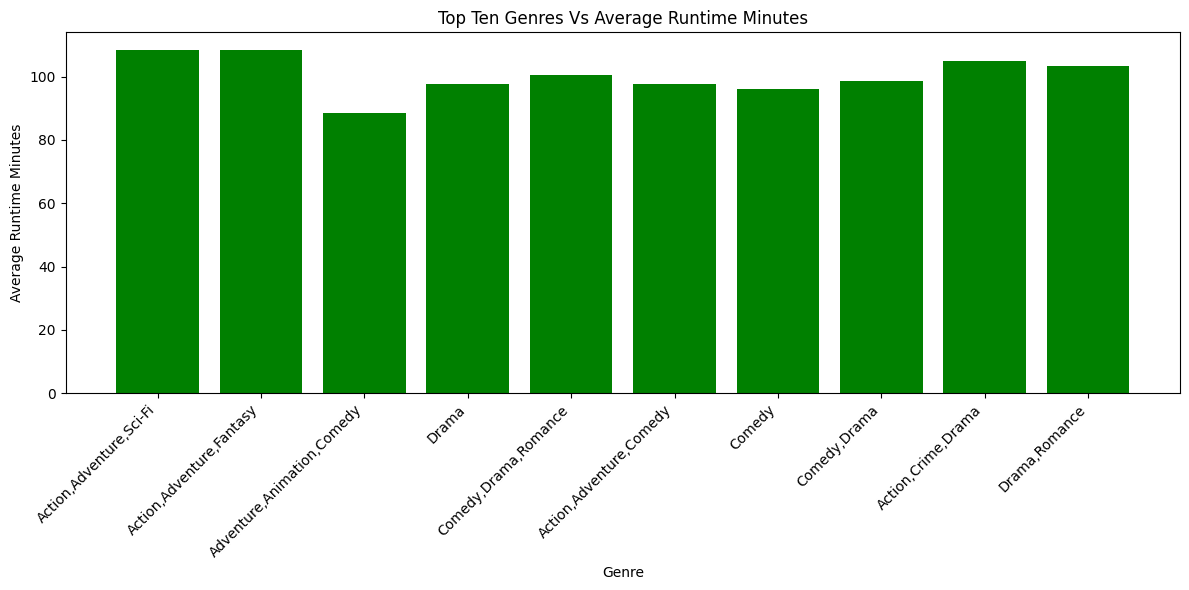

In [16]:
#Calculate average runtime_minutes for each genre
average_runtime_minutes = merged_db_df.groupby('genres')['runtime_minutes'].mean().reset_index()

# Sort genres by total votes in descending order
sorted_genres = total_votes_per_genre.sort_values(by='numvotes', ascending=False)

# Merge average_runtime_minutes with sorted_genres on the 'genres' column
sorted_genres = pd.merge(sorted_genres, average_runtime_minutes, how='left', left_on='genres', right_on='genres')

# Select the top ten genres
top_ten_genres = sorted_genres.head(10)

#Print the top ten genres and their average runtimes
print("Top Ten Genres Based on Average Runtime Minutes:")
print(top_ten_genres[['genres', 'numvotes', 'runtime_minutes']])

#Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(top_ten_genres['genres'], top_ten_genres['runtime_minutes'], color='green')
plt.xlabel('Genre')
plt.ylabel('Average Runtime Minutes')
plt.title('Top Ten Genres Vs Average Runtime Minutes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Save the figure
plt.savefig('Top Genres Vs Runtime.jpg', format='jpeg', dpi=300)

#Show figure
plt.show()

* Recommendation: Keep the movie runtime relatively short i.e between 90minutes - 110minutes as long runtimes do not really appeal to the viewers.

* Analysis of the BOM File(Box Office Mojo)
Steps:
1. Analyze the trend of the foreign gross and domestic gross over the years.(upward trend)
2. Analyze the overall total gross over the years.(upward trend)
3. Analyze the overall total gross by studio. Notice which studios generate the highest total gross revenue in the market.
4. Recommendations

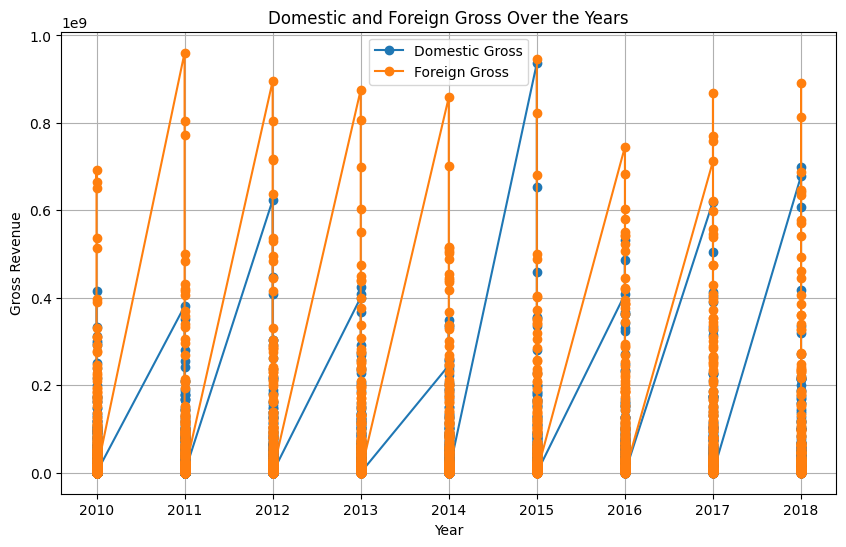

In [17]:
# Convert 'Foreign_Gross' to numeric
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors='coerce')

# Add 'Domestic_Gross' and 'Foreign_Gross' to get 'Total_Gross'
bom_df['total_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']

#Checking for Domestic Gross and Foreign Gross over the Years
#Plotting
plt.figure(figsize=(10, 6))

#Line Chart for Domestic Gross
plt.plot(bom_df['year'], bom_df['domestic_gross'], marker='o', label='Domestic Gross')

#Line Chart for Foreign Gross
plt.plot(bom_df['year'], bom_df['foreign_gross'], marker='o', label='Foreign Gross')

#Add Labels
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.title('Domestic and Foreign Gross Over the Years')
plt.legend()
plt.grid(True)

#Save figure
plt.savefig('Domestic and Foreign Gross Over the Years.jpg', format='jpeg', dpi=300)

#Show figure
plt.show()

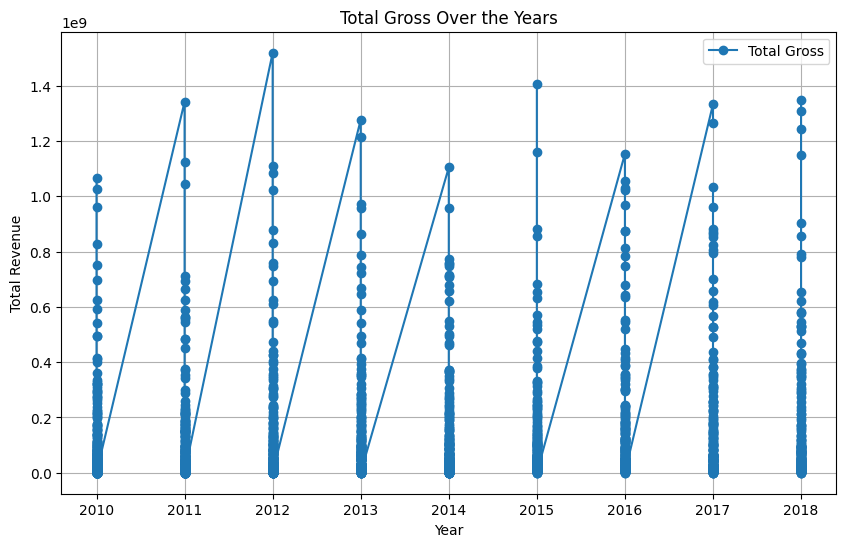

In [18]:
#Checking Total Gross over the Years
#Plotting
plt.figure(figsize=(10, 6))

#Line Chart for Total Gross
plt.plot(bom_df['year'], bom_df['total_gross'], marker='o', label='Total Gross')

#Add Labels
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Gross Over the Years')
plt.legend()
plt.grid(True)

#Save figure
plt.savefig('Total Gross Over The Years.jpg', format='jpeg', dpi=300)

#Show Figure
plt.show()

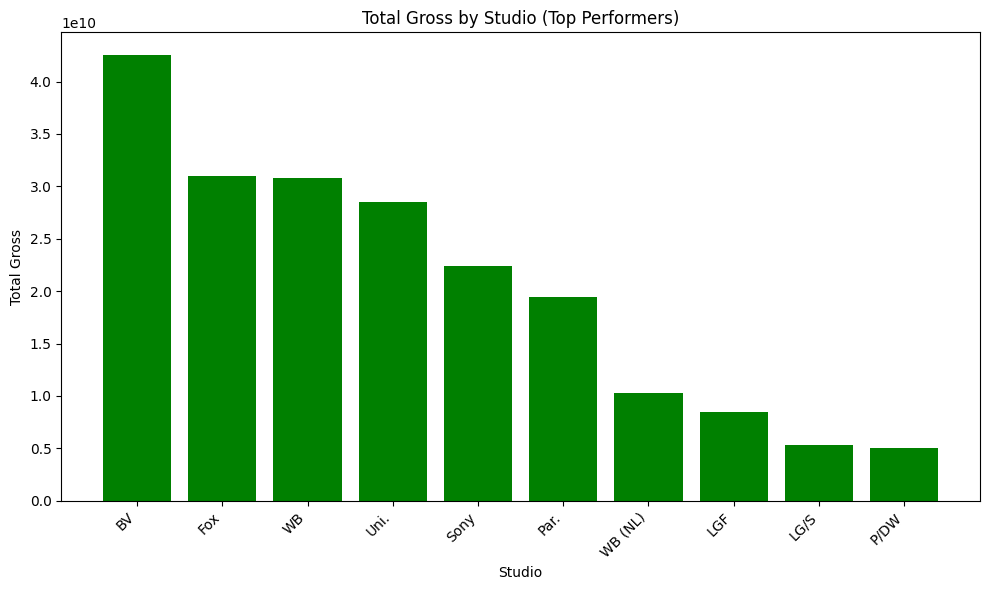

In [19]:
# Group by Studio and calculate the total gross for each studio
total_gross_by_studio = bom_df.groupby('studio')['total_gross'].sum().reset_index()

total_gross_by_studio = total_gross_by_studio.sort_values(by='total_gross', ascending=False)

#Select only the first ten studios
top_10_studios = total_gross_by_studio.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_10_studios['studio'], top_10_studios['total_gross'], color='green')

# Add labels and title
plt.xlabel('Studio')
plt.ylabel('Total Gross')
plt.title('Total Gross by Studio (Top Performers)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

#Save figure
plt.savefig('Total Gross by Studio(Top Performers)')

#Show figure
plt.show()

* Recommendation: Consider signing with BV studios as they generate the highest total gross revenue in the market.

* Analysis of the BUDGETS File(Movie Budgets)
Steps:
1. Convert object columns to numerical columns in order to perform numerical functions
2. Calculate the correlation matrix of the numerical columns

Correlation Matrix:
                   production_budget  domestic_gross  worldwide_gross
production_budget           1.000000        0.046284        -0.011876
domestic_gross              0.046284        1.000000         0.348420
worldwide_gross            -0.011876        0.348420         1.000000


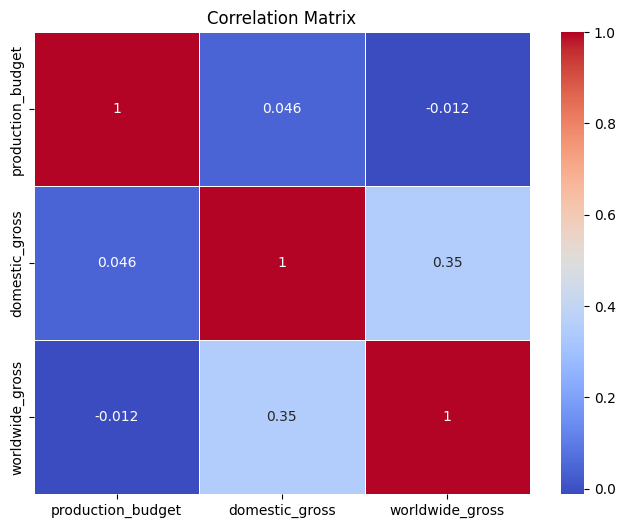

In [20]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#Specify the object columns you want to encode
object_columns = budgets_df.select_dtypes(include=['object']).columns

#Create a label encorder object
label_encoder = LabelEncoder()

#Apply label encoding to each object column
for column in object_columns:
    budgets_df['production_budget'] = label_encoder.fit_transform(budgets_df['production_budget'])
    budgets_df['domestic_gross'] = label_encoder.fit_transform(budgets_df['domestic_gross'])
    budgets_df['worldwide_gross'] = label_encoder.fit_transform(budgets_df['worldwide_gross'])

#Select numeric columns for correlation analysis
numeric_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']

#Subset the DataFrame with only numeric columns
budgets_numeric_df = budgets_df[numeric_columns]

#Calculate the correlation matrix
correlation_matrix = budgets_numeric_df.corr()

#Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

#Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

* The correlation matrix provides the information about the linear relationships between the variables. The positive correlations suggest that as one variable increases, the other tends to increase as well. The strength of the correlation coefficients helps quantify the degree of association, with higher values indicating stronger relationships.

Interpretations:
1. Production Budget and Domestic Gross
There is a positive correlation of 0.046 between production budget and domestic gross.
A correlation coefficient of 0.046 suggests a very weak positive relationship.
This indicates that, on average, movies with higher production budgets tend to have higher domestic gross earnings, but the degree of increase is modest.

2. Production Budget and Worldwide Gross
There is a negative correlation of 0.012 between production budget and worldwide gross.
A correlation coefficient of 0.012 suggests a very weak negative relationship.
This indicates that, on average, there is a very weak tendency of movies with higher production budgets ending up having low worldwide gross earnings.

3. Domestic Gross and Worldwide Gross
There is a positive correlation of 0.35 between domestic gross and worldwide gross.
A correlation of 0.35 suggests a moderate positive relationship.
This indicates that, on average, observing movies with higher domestic gross earnings makes it moderately more likely to observe higher worldwide gross earnings.

Overall:
There is a more substantial relationship between domestic gross and worldwide gross compared to the other two relationships. Additionally, correlation is not causation and other factors may influence the observed relationships.

* Calculate Return on Investment(ROI), Visualize financial metrics over time to identify industry trends

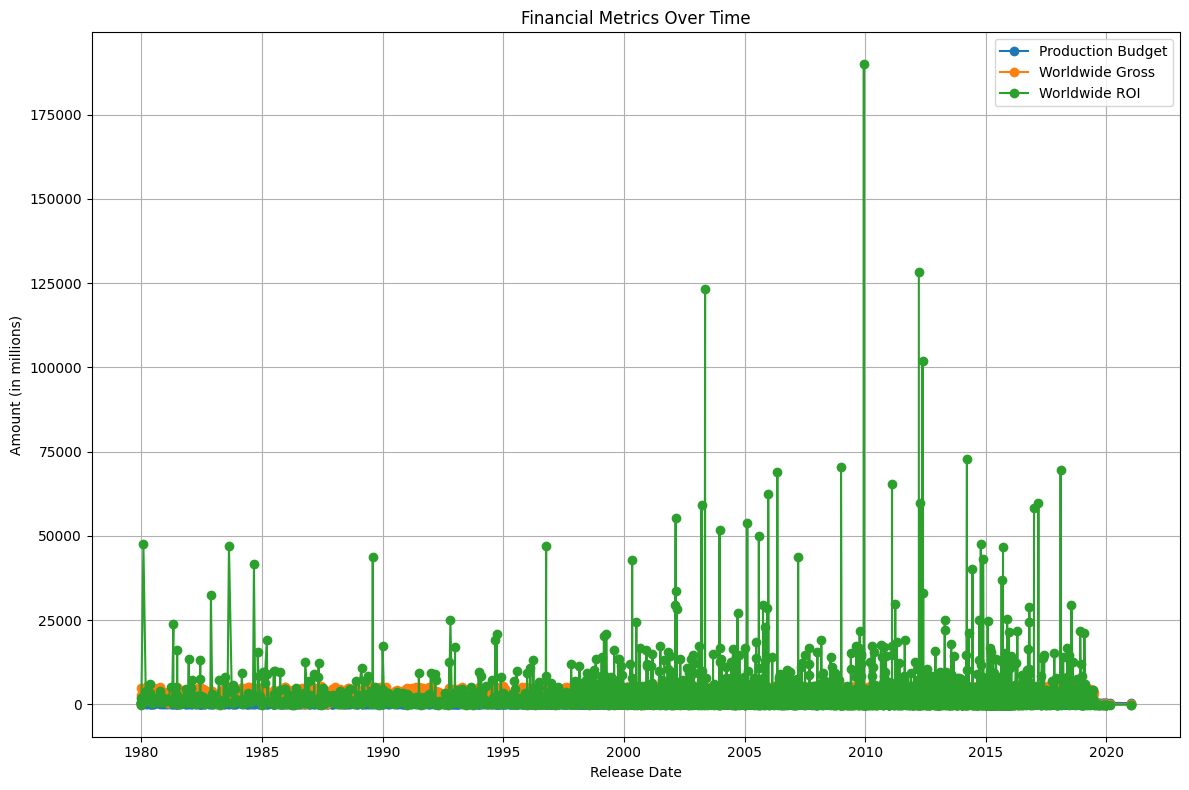


Analysis:
1. The line chart illustrates the trend of production budgets, worldwide gross, and ROI over time.
2. The production budgets seem to have increased over the years, indicating a potential inflation in the movie industry.
3. Worldwide gross shows fluctuations, suggesting variations in movie performance.
4. Worldwide ROI provides insights into the profitability of movies, highlighting periods of success and challenges.


In [21]:
#Calculate ROI for both domestic and worldwide gross
budgets_df['domestic_roi'] = ((budgets_df['domestic_gross'] - budgets_df['production_budget']) / budgets_df['production_budget']) * 100
budgets_df['worldwide_roi'] = ((budgets_df['worldwide_gross'] - budgets_df['production_budget']) / budgets_df['production_budget']) * 100

#Visualize financial metrics(production, gross, roi)
#Convert release date to datetime format
budgets_df['release_date'] = pd.to_datetime(budgets_df['release_date'])

# Filter data for release dates from 1980 onwards
budgets_df = budgets_df[budgets_df['release_date'].dt.year >= 1980]

#Sort the DataFrame by release date
budgets_df = budgets_df.sort_values(by='release_date')

#Plotting financial metrics over time
plt.figure(figsize=(12, 8))

#Line chart for production budget over time
plt.plot(budgets_df['release_date'], budgets_df['production_budget'], label='Production Budget', marker='o')

#Line chart for gross over time
plt.plot(budgets_df['release_date'], budgets_df['worldwide_gross'], label='Worldwide Gross', marker='o')

#Line chart for ROI over time 
plt.plot(budgets_df['release_date'], budgets_df['worldwide_roi'], label='Worldwide ROI', marker='o')

#Add labels and title
plt.xlabel('Release Date')
plt.ylabel('Amount (in millions)')
plt.title('Financial Metrics Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

#Save figure
plt.savefig('Financial Metrics Over Time.jpg', format='jpeg', dpi=300)

#Show figure
plt.show()

# Analysis 
print("\nAnalysis:")
print("1. The line chart illustrates the trend of production budgets, worldwide gross, and ROI over time.")
print("2. The production budgets seem to have increased over the years, indicating a potential inflation in the movie industry.")
print("3. Worldwide gross shows fluctuations, suggesting variations in movie performance.")
print("4. Worldwide ROI provides insights into the profitability of movies, highlighting periods of success and challenges.")


* Explore the relationship between production budget and ROI to optimize budget allocation

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


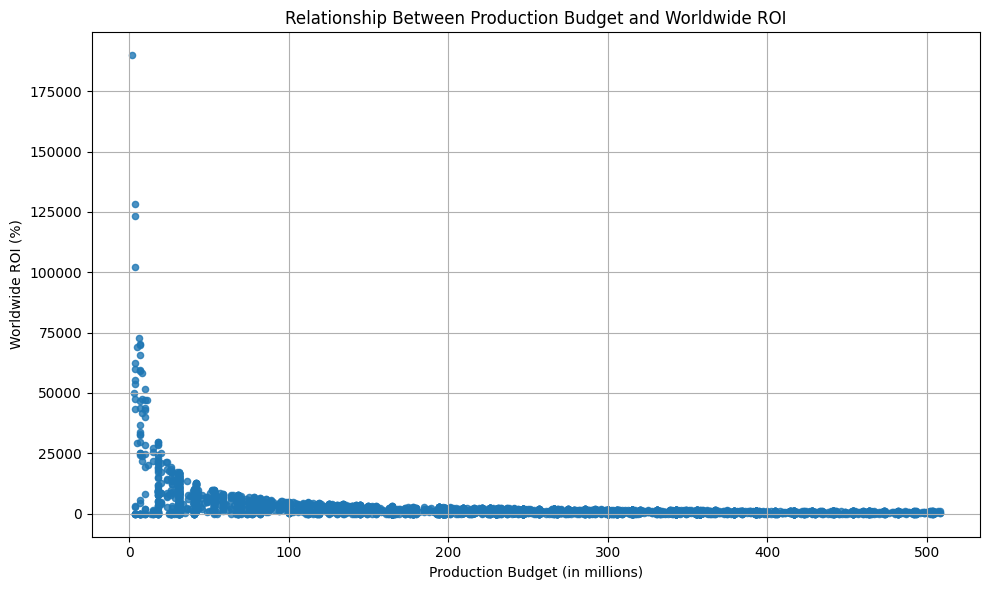

In [23]:
# Scatter plot with regression line for production budget vs. worldwide ROI
plt.figure(figsize=(10, 6))
scatter = sns.regplot(x='production_budget', y='worldwide_roi', data=budgets_df, scatter_kws={'s': 20}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Worldwide ROI (%)')
plt.title('Relationship Between Production Budget and Worldwide ROI')
plt.grid(True)
plt.tight_layout()

#Save figure
plt.savefig('Relationship Between Budget and ROI.jpg', format='jpeg', dpi=300)

#Show figure
plt.show()

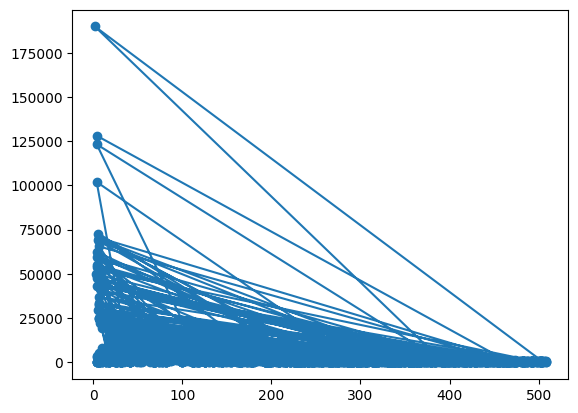

Slope: 2.6272207166516104


In [24]:
#Showing and calculating the slope of the regression line
x_values = budgets_df['production_budget']
y_values = budgets_df['worldwide_roi']

#Create a line plot
plt.plot(x_values, y_values, marker='o', linestyle='-')

#Calculate the slope using two points i.e the first and last points
x1, y1 = x_values[0], y_values[0]
x2, y2 = x_values.iloc[-1], y_values.iloc[-1]

#Calculate the slope(change in y over change in x)
slope = (y2 - y1) / (x2 - x1)

#Plot
plt.show()

print("Slope:", slope)

* Interpretation:
1. The slope is positive, the slope suggests that, on average, an increase in the production budget is associated with an increase in worldwide ROI.

* Recommendation:
Consider executing the investment upto a production budget range of between 200M -400M to maximize ROI. 

## Future Improvements
* Further investigate periods of high ROI to identify factors contributing to success.
* Analyze fluctuations in worldwide gross to understand the impact of external factors such as market trends or economic conditions.
* Consider exploring the relationship between production budget and ROI to optimize budget allocation.

## Conclusions
* The Action, Adventure, Sci-Fi genre is the most popular and highly appeals to the audience.
* Short movie runtimes ranging between 90 to 110 minutes are most preffered by audience.
* There are specific studios recording great performance at the box office, leading to high earnings.
* There is a strong positive correlation between production budget and ROI. Movies with high production budgets register high overall ROI.

## Recommendations

* Venture into the Action, Adventure, Sci-Fi genre as it exhibits notable success at the box office.
* Keep the movie runtime ralatively short i.e between 90 to 110 minutes, a duration associated with favorable audience reception.
* Sign/ Partner with BV Studios since it registers the best performance at box office and generates the highest total gross earnings in the industry.
* Invest between 200 to 400 million as this is the optimal budget range in order to maximize ROI.  

